#**Classificação de Saúde de Folhas de Plantas Usando Redes Neurais Convolucionais**

# Introdução

Este trabalho tem como objetivo desenvolver e comparar modelos de inteligência artificial (IA) para a classificação de imagens de folhas de plantas como "Saudáveis" ou "Doentes". Para isso, utilizamos duas bases de dados e dois modelos distintos:

## Bases de Dados Utilizadas

1. **Tomato Leaf Disease Dataset**: Este conjunto de dados é baseado no conjunto de dados Plant Village. Como o conjunto de dados estava desbalanceado e não foi dividido, fizemos as modificações necessárias para equilibrar as classes e o carregamos aqui. Ele contém imagens de folhas doentes da planta de tomate. O dataset pode ser acessado em [Kaggle - Tomato Leaf Disease](https://www.kaggle.com/datasets/shylesh101/tomato-leaf-disease).

2. **Mango Leaf Health Dataset**: Este conjunto de dados contém imagens em alta resolução de folhas de manga, categorizadas em duas classes: Saudáveis e Doentes. Ele é projetado para tarefas de classificação binária, permitindo que modelos de aprendizado de máquina identifiquem o estado de saúde das folhas de manga. O conjunto de dados contribui para os avanços na agricultura, auxiliando sistemas automatizados na detecção precoce de doenças, melhorando a produtividade das culturas e reduzindo perdas. O dataset está disponível em [Kaggle - Mango Leaf Health Dataset](https://www.kaggle.com/datasets/imranavenger/mango-leaf-health-dataset-healthy-vs-diseased).

## Modelos de IA Desenvolvidos

1. **GoogLeNet**: Um modelo pré-treinado que foi ajustado para a tarefa específica de classificação de saúde das folhas. Este modelo é conhecido por sua profundidade e capacidade de capturar padrões complexos em imagens.

2. **Modelo Customizado**: Uma rede neural personalizada, projetada para ser mais leve e rápida, com menos parâmetros do que a GoogLeNet. Este modelo foi desenvolvido para oferecer uma solução eficiente em termos de recursos, enquanto ainda proporciona uma boa precisão na classificação.

## Comparação dos Modelos

A eficácia dos modelos foi avaliada usando as mesmas bases de dados, e as métricas de desempenho, como acurácia, precisão, recall e F1-score, foram calculadas para cada um. Além disso, uma matriz de confusão foi gerada para visualizar o desempenho dos modelos em termos de verdadeiro positivo, falso positivo, verdadeiro negativo e falso negativo.

Os resultados das comparações são apresentados em gráficos, que foram gerados para ilustrar as diferenças de desempenho entre os modelos GoogLeNet e Custom. Esses gráficos mostram como cada modelo se comporta em termos de precisão e capacidade de generalização, permitindo uma análise detalhada de suas vantagens e limitações.


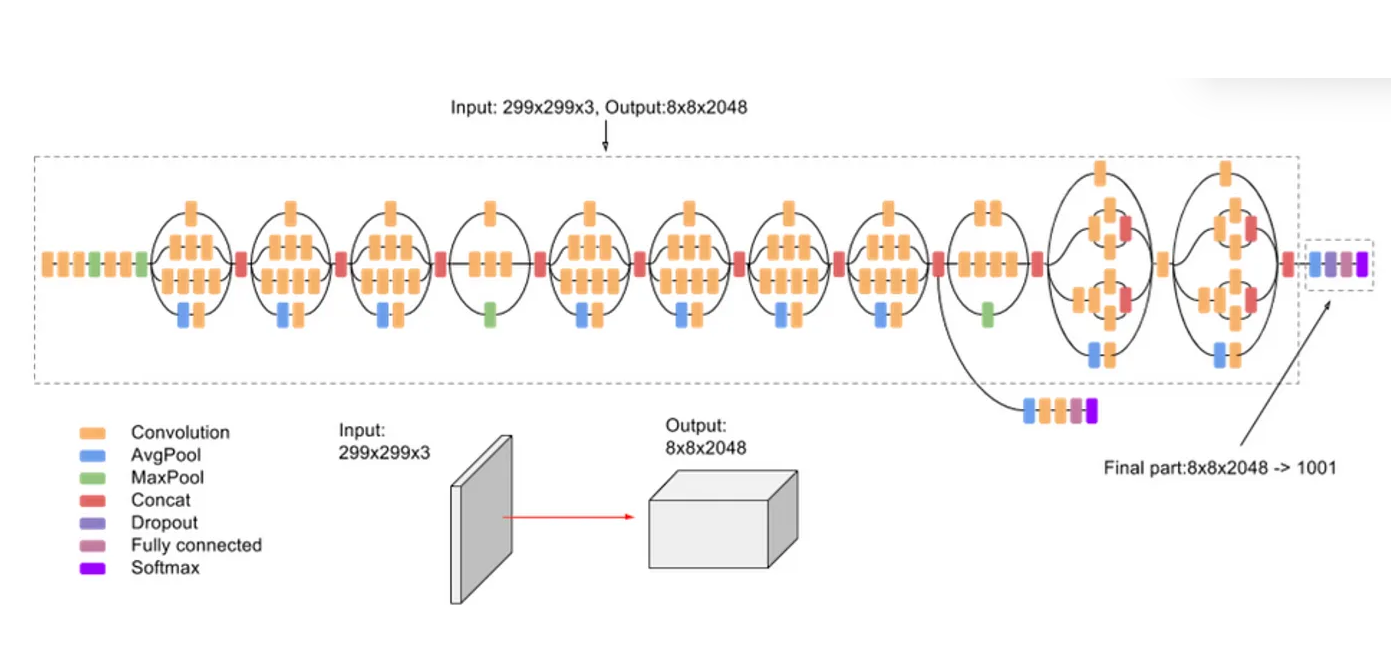

##**Metodologia**

O projeto utiliza Redes Neurais Convolucionais (CNNs), uma abordagem avançada de aprendizado de máquina amplamente reconhecida por sua eficácia em tarefas de classificação de imagens. Para este trabalho, duas arquiteturas de CNN foram exploradas: a GoogLeNet, conhecida por sua profundidade e capacidade de capturar padrões complexos, e uma rede neural customizada, projetada para ser mais leve e eficiente em termos de recursos.

Ambos os modelos foram ajustados para a tarefa de classificação binária, permitindo que identifiquem se as folhas de plantas estão "Saudáveis" ou "Doentes". O treinamento dos modelos é realizado utilizando imagens extraídas de dois conjuntos de dados distintos: o Conjunto de Dados de Doenças de Folhas de Tomate e o Conjunto de Dados de Saúde de Folhas de Manga. Esses datasets fornecem uma diversidade de exemplos que ajudam os modelos a aprender a identificar características visuais específicas associadas a diferentes estados de saúde das folhas.

A comparação entre os modelos GoogLeNet e Custom permite avaliar a eficácia de cada abordagem, considerando tanto a precisão na classificação quanto a eficiência computacional, aspectos cruciais para a aplicação prática na detecção automatizada de doenças em folhas de plantas.

### **1. Preparação dos Dados**
As imagens são carregadas e pré-processadas utilizando a classe ImageFolder do módulo torchvision.datasets, que organiza as imagens em diretórios de acordo com suas classes. Durante o carregamento, transformações são aplicadas para garantir que todas as imagens tenham o mesmo formato e escala. As transformações incluem:


Redimensionamento: As imagens são redimensionadas para 128x128 pixels.

Aumento de Dados: Técnicas como RandomHorizontalFlip e RandomRotation são aplicadas para aumentar a diversidade do conjunto de dados e ajudar na generalização do modelo.

Conversão para Tensor: As imagens são convertidas em tensores, que são o formato exigido pelo PyTorch.

Normalização: As imagens são normalizadas utilizando a média e o desvio padrão padrão do conjunto de dados ImageNet, que são [0.485, 0.456, 0.406] e [0.229, 0.224, 0.225], respectivamente. Isso ajuda a estabilizar o treinamento.

Após a aplicação das transformações, os dados são divididos em conjuntos de treinamento, validação e teste. A divisão é feita da seguinte forma:


Proporção do Conjunto de Treinamento: 70% dos dados são utilizados para o treinamento do modelo.

Proporção do Conjunto de Validação: 15% dos dados são utilizados para validar o desempenho do modelo durante o treinamento.

Proporção do Conjunto de Teste: 15% dos dados restantes são utilizados para testar o modelo após o treinamento.

O carregamento e a divisão dos dados são realizados pela função load_data, que também cria DataLoaders para facilitar o acesso aos dados em lotes durante o treinamento e a validação.

Código Exemplo para Carregar Dados
Aqui está um exemplo de como a função load_data é utilizada para carregar e preparar os dados:

###Código

In [ ]:
import logging
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [ ]:
def load_data(data_dir, batch_size=32, train_ratio=0.7, val_ratio=0.15, transform=None):
    """
    Carrega o conjunto de dados e o divide em conjuntos de treinamento, validação e teste.

    Args:
        data_dir (str): Caminho para o diretório do conjunto de dados.
        batch_size (int): Tamanho do lote para o DataLoader.
        train_ratio (float): Proporção do conjunto de dados a incluir no conjunto de treinamento.
        val_ratio (float): Proporção do conjunto de dados a incluir no conjunto de validação.
        transform (callable, optional): Transformações a serem aplicadas às imagens.

    Returns:
        DataLoader: DataLoaders para treinamento, validação e teste.
    """
    logging.info("Iniciando o processo de carregamento de dados...")

    # Use default transformations if none are provided
    if transform is None:
        logging.info("Definindo transformações padrão para os dados...")
        transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.Resize((128, 128)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalização padrão do ImageNet
        ])

    # Carrega o conjunto de dados
    logging.info(f"Carregando o conjunto de dados do diretório: {data_dir}")
    try:
        dataset = datasets.ImageFolder(root=data_dir, transform=transform)
    except Exception as e:
        logging.error(f"Erro ao carregar o conjunto de dados: {e}")
        return None, None, None

    logging.info(f"Número total de amostras no conjunto de dados: {len(dataset)}")
    logging.info(f"Classes encontradas: {dataset.classes}")

    # Divide o conjunto de dados em conjuntos de treinamento, validação e teste
    total_size = len(dataset)
    train_size = int(train_ratio * total_size)
    val_size = int(val_ratio * total_size)
    test_size = total_size - train_size - val_size
    logging.info(f"Dividindo o conjunto de dados: {train_size} amostras de treinamento, {val_size} amostras de validação, {test_size} amostras de teste.")

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    # Cria DataLoaders
    logging.info(f"Criando DataLoaders com tamanho de lote: {batch_size}")
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    logging.info("Processo de carregamento de dados concluído com sucesso.")
    return train_loader, val_loader, test_loader

## Comparação entre os Modelos Custom e GoogLeNet

Neste projeto, exploramos duas abordagens distintas para a classificação de folhas de plantas: um modelo de rede neural customizado e a arquitetura GoogLeNet. Ambos os modelos foram implementados em scripts separados (`train.py` para o modelo customizado e `train_googleNet.py` para o GoogLeNet), e apresentam diferenças notáveis em suas configurações e características de treinamento.

### Modelo Customizado

- **Arquitetura**: O modelo customizado é uma rede neural sequencial com camadas densas. Ele começa com uma camada de entrada que aplana as imagens em um vetor, seguida por duas camadas densas com 256 e 128 neurônios, respectivamente, e termina com uma camada de saída para classificação binária.
- **Inicialização**: Os pesos são inicializados usando a técnica de He, apropriada para redes com ativação ReLU.
- **Eficiência Computacional**: Este modelo é projetado para ser leve e rápido, com menos parâmetros, o que pode ser vantajoso em ambientes com recursos limitados.
- **Treinamento**: Utiliza o otimizador Adam e implementa early stopping para evitar overfitting. Não possui scheduler para ajuste da taxa de aprendizado.

##Código

In [ ]:
import os
import logging
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from torchvision import transforms
from sklearn.metrics import accuracy_score
from torch.utils.tensorboard import SummaryWriter
from src.data import load_data
import yaml
import time
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

def load_config(file_path="config.yaml"):
    """Carrega as configurações do arquivo YAML."""
    logging.info(f"Carregando configurações do arquivo: {file_path}")
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)

def calculate_bias_variance(target, predicted):
    """Calcula o viés e a variância das previsões do modelo."""
    bias = np.mean(predicted) - np.mean(target)
    variance = np.var(predicted)
    logging.debug(f"Cálculo de viés: {bias}, variância: {variance}")
    return bias, variance

class LeafHealthClassifier:
    """Classe para treinar um classificador de saúde das folhas."""

    def __init__(self, config):
        """Inicializa o classificador com as configurações fornecidas."""
        logging.info("Inicializando o classificador de saúde das folhas.")
        self.data_dir = config['data']['training']['data_dir']
        self.epochs = config['data']['training']['num_epochs']
        self.lr = config['data']['training']['learning_rate']
        self.batch_size = config['data']['training']['batch_size']
        self.dataset_fraction = config['data']['training'].get('dataset_fraction', 1.0)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = self.initialize_model()
        self.writer = SummaryWriter(log_dir='runs/train')
        self.history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': [], 'bias': [], 'variance': []}

        # Configuração de logging
        log_file = os.path.join(config['logging']['log_dir'], f'train_log_{datetime.now().strftime("%Y%m%d_%H%M%S")}.txt')
        logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
        file_handler = logging.FileHandler(log_file)
        file_handler.setLevel(logging.INFO)
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        file_handler.setFormatter(formatter)
        logging.getLogger().addHandler(file_handler)

    def initialize_model(self):
        """Inicializa e configura a arquitetura da Custom CNN."""
        logging.info("Inicializando a arquitetura da Custom CNN.")
        model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(64 * 37 * 37, 512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, 2),
            nn.Softmax(dim=1)
        )
        self.initialize_weights(model)
        return model.to(self.device)

    def initialize_weights(self, model):
        """Inicializa os pesos da rede neural com a técnica de He."""
        logging.info("Inicializando pesos do modelo com a técnica de He.")
        for layer in model.modules():
            if isinstance(layer, (nn.Conv2d, nn.Linear)):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

    def train(self):
        """Função principal para treinar o modelo."""
        logging.info("Iniciando o treinamento do modelo.")
        train_loader, val_loader, _ = load_data(self.data_dir, self.batch_size, self.dataset_fraction)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr, weight_decay=1e-5)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

        best_val_loss = float('inf')
        patience = 10  # Para Early Stopping

        total_training_time = 0

        for epoch in range(self.epochs):
            start_time = time.time()
            self.model.train()
            total_loss = 0

            logging.info(f"Iniciando a época {epoch + 1}/{self.epochs}.")
            for data, target in train_loader:
                data, target = data.to(self.device), target.to(self.device)
                optimizer.zero_grad()
                outputs = self.model(data)
                loss = criterion(outputs, target)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            avg_train_loss = total_loss / len(train_loader)
            logging.info(f"Perda média de treinamento na época {epoch + 1}: {avg_train_loss:.4f}")

            # Loop de validação
            val_loss, accuracy = self.validate(val_loader, criterion)
            self.writer.add_scalar('Loss/validation', val_loss, epoch)
            self.writer.add_scalar('Accuracy/validation', accuracy, epoch)

            # Armazenar histórico
            self.history['loss'].append(avg_train_loss)
            self.history['val_loss'].append(val_loss)
            self.history['accuracy'].append(accuracy)
            self.history['val_accuracy'].append(accuracy)

            # Cálculo do viés e variância na validação
            bias, variance = calculate_bias_variance(target.cpu().numpy(), outputs.argmax(dim=1).cpu().numpy())
            self.history['bias'].append(bias)
            self.history['variance'].append(variance)

            # Ajusta a taxa de aprendizado
            scheduler.step(val_loss)

            # Implementa Early Stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
                torch.save(self.model.state_dict(), f"models/{timestamp}_leaf_health_model.pth")
                patience = 10
                logging.info(f"Modelo salvo com melhor perda de validação: {best_val_loss:.4f}")
            else:
                patience -= 1
                if patience == 0:
                    logging.info("Early stopping triggered.")
                    break

            epoch_time = time.time() - start_time
            total_training_time += epoch_time
            logging.info(f"Tempo de treinamento para a época {epoch + 1}: {epoch_time:.2f} segundos")

        logging.info(f"Tempo total de treinamento: {total_training_time:.2f} segundos")
        self.writer.close()

        # Plotar gráficos de desempenho
        self.save_metrics()

    def validate(self, val_loader, criterion):
        """Função para validar o modelo."""
        self.model.eval()
        val_loss = 0
        all_preds = []
        all_targets = []

        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(self.device), target.to(self.device)
                outputs = self.model(data)
                val_loss += criterion(outputs, target).item()
                preds = outputs.argmax(dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(target.cpu().numpy())

        avg_val_loss = val_loss / len(val_loader)
        accuracy = accuracy_score(all_targets, all_preds)
        logging.info(f"Validação concluída: Val Loss: {avg_val_loss:.4f}, Acurácia: {accuracy:.4f}")
        return avg_val_loss, accuracy

    def save_history(self, filename='training_history.csv'):
        """Salva o histórico de treinamento em um arquivo CSV com timestamp."""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        history_dir = 'history'

        if not os.path.exists(history_dir):
            os.makedirs(history_dir)

        full_filename = os.path.join(history_dir, f'{timestamp}_{filename}')

        history_df = pd.DataFrame(self.history)
        history_df.to_csv(full_filename, index=False)
        logging.info(f"Histórico de treinamento salvo em {full_filename}.")

    def save_metrics(self):
        """Função para salvar as métricas de desempenho em arquivos de imagem sem exibi-las."""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        train_dir = 'train'
        if not os.path.exists(train_dir):
            os.makedirs(train_dir)

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.history['loss'], label='Loss')
        plt.plot(self.history['val_loss'], label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.ylim([0.0, 1])
        plt.legend(loc='upper right')
        plt.title('Gráfico de Perda')
        plt.savefig(os.path.join(train_dir, f'{timestamp}_grafico_perda.png'))
        plt.close()

        plt.subplot(1, 2, 2)
        plt.plot(self.history['accuracy'], label='Accuracy')
        plt.plot(self.history['val_accuracy'], label='Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim([0.0, 1])
        plt.legend(loc='lower right')
        plt.title('Gráfico de Acurácia')
        plt.savefig(os.path.join(train_dir, f'{timestamp}_grafico_acuracia.png'))
        plt.close()

def main():
    config = load_config()
    trainer = LeafHealthClassifier(config)
    trainer.train()
    trainer.save_history()

if __name__ == "__main__":
    logging.info("Iniciando o script Leaf Health Diagnostician.")
    main()
    logging.info("Script concluído.")

## Modelo GoogLeNet

- **Arquitetura**: GoogLeNet é uma rede profunda e complexa, conhecida por sua capacidade de capturar padrões complexos em dados visuais. Ela foi ajustada para classificação binária, com a camada final modificada para classificar as folhas.
- **Inicialização**: Além da inicialização dos pesos, GoogLeNet é configurado com `aux_logits=False` para desativar saídas auxiliares, simplificando a tarefa de classificação.
- **Capacidade de Aprendizado**: Devido à sua profundidade, GoogLeNet tem uma maior capacidade de aprendizado, potencialmente oferecendo melhor desempenho em tarefas complexas.
- **Treinamento**: Também utiliza o otimizador Adam, mas inclui um scheduler para reduzir a taxa de aprendizado com base na perda de validação, além de implementar early stopping.

##Código

In [ ]:
import os
import logging
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from torchvision import models
from sklearn.metrics import accuracy_score
from torch.utils.tensorboard import SummaryWriter
from src.data import load_data
import yaml
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd  # Importando pandas para salvar histórico

def load_config(file_path="config.yaml"):
    """Carrega as configurações do arquivo YAML."""
    logging.info(f"Carregando configurações do arquivo: {file_path}")
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)

def calculate_bias_variance(target, predicted):
    """Calcula o viés e a variância das previsões do modelo."""
    bias = np.mean(predicted) - np.mean(target)
    variance = np.var(predicted)
    logging.debug(f"Cálculo de viés: {bias}, variância: {variance}")
    return bias, variance

config = load_config()
log_file = os.path.join(config['logging']['log_dir'], f'train_log_{datetime.now().strftime("%Y%m%d_%H%M%S")}.txt')

# Configure logging to save to a file with a timestamp and show in terminal
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
file_handler = logging.FileHandler(log_file)
file_handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)

# Adiciona o handler do arquivo ao logger
logging.getLogger().addHandler(file_handler)

class LeafHealthClassifier:
    """Classe para treinar um classificador de saúde das folhas."""

    def __init__(self, config):
        """Inicializa o classificador com as configurações fornecidas."""
        logging.info("Inicializando o classificador de saúde das folhas.")
        self.data_dir = config['data']['training']['data_dir']
        self.epochs = config['data']['training']['num_epochs']
        self.lr = config['data']['training']['learning_rate']
        self.batch_size = config['data']['training']['batch_size']
        self.dataset_fraction = config['data']['training'].get('dataset_fraction', 1.0)  # Padrão é 100%
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = self.initialize_model()
        self.writer = SummaryWriter(log_dir='runs/train')
        self.history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': [], 'bias': [], 'variance': []}  # Para armazenar o histórico

    def initialize_model(self):
        """Inicializa e configura o modelo GoogLeNet."""
        logging.info("Inicializando o modelo GoogLeNet.")
        model = models.googlenet(aux_logits=False, init_weights=True)  # Adiciona init_weights=True
        model.fc = nn.Linear(model.fc.in_features, 2)  # Ajustando para 2 classes
        model = model.to(self.device)
        self.initialize_weights(model)
        return model

    def initialize_weights(self, model):
        """Inicializa os pesos da rede neural com a técnica de He."""
        logging.info("Inicializando pesos do modelo.")
        for layer in model.modules():
            if isinstance(layer, (nn.Conv2d, nn.Linear)):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
            elif isinstance(layer, nn.BatchNorm2d):
                nn.init.ones_(layer.weight)
                nn.init.zeros_(layer.bias)

    def train(self):
        """Função principal para treinar o modelo."""
        logging.info("Iniciando o treinamento do modelo.")
        train_loader, val_loader, _ = load_data(self.data_dir, self.batch_size, self.dataset_fraction)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr, weight_decay=1e-5)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)

        best_val_loss = float('inf')
        patience = 5  # Para Early Stopping

        # Medir tempo de treinamento
        total_training_time = 0

        for epoch in range(self.epochs):
            start_time = time.time()  # Início do tempo de treinamento para a época
            self.model.train()  # Muda o modelo para modo de treinamento
            total_loss = 0

            logging.info(f"Iniciando a época {epoch + 1}/{self.epochs}.")
            for data, target in train_loader:
                data, target = data.to(self.device), target.to(self.device)
                optimizer.zero_grad()
                outputs = self.model(data)

                if isinstance(outputs, tuple):
                    main_output = outputs[0]
                    loss = criterion(main_output, target)
                    if len(outputs) > 1:  # Se há saída auxiliar
                        aux_output = outputs[1]
                        aux_loss = criterion(aux_output, target)
                        loss += 0.4 * aux_loss  # Peso da perda auxiliar
                else:
                    loss = criterion(outputs, target)

                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            avg_train_loss = total_loss / len(train_loader)
            logging.info(f"Perda média de treinamento na época {epoch + 1}: {avg_train_loss:.4f}")

            # Loop de validação
            val_loss, accuracy = self.validate(val_loader, criterion)
            self.writer.add_scalar('Loss/validation', val_loss, epoch)
            self.writer.add_scalar('Accuracy/validation', accuracy, epoch)
            logging.info(f"Epoch {epoch + 1}/{self.epochs}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy:.4f}")

            # Armazenar histórico
            self.history['loss'].append(avg_train_loss)
            self.history['val_loss'].append(val_loss)
            self.history['accuracy'].append(accuracy)
            self.history['val_accuracy'].append(accuracy)

            # Cálculo do viés e variância na validação
            bias, variance = calculate_bias_variance(target.cpu().numpy(), outputs.argmax(dim=1).cpu().numpy())
            self.history['bias'].append(bias)
            self.history['variance'].append(variance)

            # Ajusta a taxa de aprendizado
            scheduler.step(val_loss)

            # Implementa Early Stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
                torch.save(self.model.state_dict(), f"models/{timestamp}_leaf_health_model.pth")
                patience = 5
                logging.info(f"Modelo salvo com melhor perda de validação: {best_val_loss:.4f}")
            else:
                patience -= 1
                if patience == 0:
                    logging.info("Early stopping triggered.")
                    break

            # Calcular e registrar o tempo de treinamento para a época
            epoch_time = time.time() - start_time
            total_training_time += epoch_time
            logging.info(f"Tempo de treinamento para a época {epoch + 1}: {epoch_time:.2f} segundos")

        logging.info(f"Tempo total de treinamento: {total_training_time:.2f} segundos")
        self.writer.close()  # Fecha o TensorBoard writer

        # Plotar gráficos de desempenho
        self.save_metrics()

    def save_history(self, filename='training_history.csv'):
        """Salva o histórico de treinamento em um arquivo CSV com timestamp."""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")  # Formato: YYYYMMDD_HHMMSS
        history_dir = 'history'

        # Cria o diretório se não existir
        if not os.path.exists(history_dir):
            os.makedirs(history_dir)

        # Define o caminho completo do arquivo
        full_filename = os.path.join(history_dir, f'{timestamp}_{filename}')

        # Salva o DataFrame em um arquivo CSV
        history_df = pd.DataFrame(self.history)
        history_df.to_csv(full_filename, index=False)
        logging.info(f"Histórico de treinamento salvo em {full_filename}.")

    def validate(self, val_loader, criterion):
        """Função para validar o modelo."""
        self.model.eval()
        val_loss = 0
        all_preds = []
        all_targets = []

        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(self.device), target.to(self.device)
                outputs = self.model(data)
                val_loss += criterion(outputs, target).item()
                preds = outputs.argmax(dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(target.cpu().numpy())

        avg_val_loss = val_loss / len(val_loader)
        accuracy = accuracy_score(all_targets, all_preds)
        logging.info(f"Validação concluída: Val Loss: {avg_val_loss:.4f}, Acurácia: {accuracy:.4f}")
        return avg_val_loss, accuracy

    def save_metrics(self):
        """Função para salvar as métricas de desempenho em arquivos de imagem sem exibi-las."""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        train_dir = 'train'
        if not os.path.exists(train_dir):
            os.makedirs(train_dir)

        plt.figure(figsize=(12, 5))

        # Gráfico de perda
        plt.subplot(1, 2, 1)
        plt.plot(self.history['loss'], label='Loss')
        plt.plot(self.history['val_loss'], label='Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.ylim([0.0, 1])
        plt.legend(loc='upper right')
        plt.title('Gráfico de Perda')
        plt.savefig(os.path.join(train_dir, f'{timestamp}_grafico_perda.png'))  # Salva a imagem com timestamp
        plt.close()

        # Gráfico de acurácia
        plt.subplot(1, 2, 2)
        plt.plot(self.history['accuracy'], label='Accuracy')
        plt.plot(self.history['val_accuracy'], label='Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim([0.0, 1])
        plt.legend(loc='lower right')
        plt.title('Gráfico de Acurácia')
        plt.savefig(os.path.join(train_dir, f'{timestamp}_grafico_acuracia.png'))  # Salva a imagem com timestamp
        plt.close()

# Verifica se o arquivo está sendo executado
if __name__ == "__main__":
    config = load_config()  # Carrega as configurações do arquivo YAML
    trainer = LeafHealthClassifier(config)
    trainer.train()
    trainer.save_history()


## **3. Treinamento**

Durante o treinamento, o modelo é alimentado com dados de treinamento em múltiplas épocas. Utilizamos o otimizador **Adam**, que é um método de otimização eficiente e amplamente utilizado em redes neurais. O Adam ajusta os pesos da rede com base no cálculo do gradiente da função de perda, que, neste caso, é a **função de perda de entropia cruzada** (`CrossEntropyLoss`). Essa função de perda mede a discrepância entre as predições do modelo e os rótulos reais, fornecendo um feedback crucial para o ajuste dos pesos.

O treinamento é realizado em várias épocas, onde cada época consiste em um ciclo completo através do conjunto de dados de treinamento. Em cada iteração, os dados de entrada são passados pela rede, e as saídas são comparadas com os rótulos reais para calcular a perda. O otimizador então utiliza essa perda para atualizar os pesos da rede, minimizando assim o erro nas previsões.

Além disso, implementamos um **scheduler de taxa de aprendizado** (`ReduceLROnPlateau`), que ajusta dinamicamente a taxa de aprendizado durante o treinamento. Esse scheduler reduz a taxa de aprendizado quando a perda de validação não melhora por um número específico de épocas (definido pela paciência). Essa estratégia ajuda a estabilizar o treinamento e a evitar oscilações nas atualizações dos pesos, permitindo que o modelo converja de forma mais eficiente.

O histórico de treinamento, que inclui métricas como perda e acurácia, é registrado e salvo em um arquivo CSV. Isso permite que o desempenho do modelo seja monitorado ao longo do tempo e facilita a análise posterior. Após o treinamento, gráficos de acurácia e perda são gerados, permitindo uma visualização clara da evolução do modelo durante as épocas.

Ao final do treinamento, o modelo é avaliado em um conjunto de validação, onde a perda e a acurácia são calculadas. As métricas de desempenho, como precisão, recall e F1-score, também são calculadas para fornecer uma visão abrangente da eficácia do modelo.

##Código

In [ ]:
def save_history(self, filename='training_history.csv'):
    """Salva o histórico de treinamento em um arquivo CSV."""
    history_df = pd.DataFrame(self.history)
    history_df.to_csv(filename, index=False)
    logging.info(f"Histórico de treinamento salvo em {filename}.")

def validate(self, val_loader, criterion):
    """Função para validar o modelo."""
    self.model.eval()
    val_loss = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(self.device), target.to(self.device)
            outputs = self.model(data)
            val_loss += criterion(outputs, target).item()
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    accuracy = accuracy_score(all_targets, all_preds)
    return avg_val_loss, accuracy

def plot_metrics(self):
    """Função para plotar as métricas de desempenho."""
    plt.figure(figsize=(12, 5))

    # Gráfico de perda
    plt.subplot(1, 2, 1)
    plt.plot(self.history['loss'], label='Loss')
    plt.plot(self.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0.0, 1])
    plt.legend(loc='upper right')
    plt.title('Gráfico de Perda')

    # Gráfico de acurácia
    plt.subplot(1, 2, 2)
    plt.plot(self.history['accuracy'], label='Accuracy')
    plt.plot(self.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1])
    plt.legend(loc='lower right')
    plt.title('Gráfico de Acurácia')

    plt.tight_layout()
    plt.show()


### **4. Avaliação e Métricas**

Após o treinamento do modelo, a avaliação é realizada utilizando um conjunto de dados de teste separado. O script `evaluate.py` é responsável por essa funcionalidade, onde o modelo previamente treinado é carregado e avaliado em dados que não foram vistos durante o treinamento. O objetivo da avaliação é medir o desempenho do modelo em termos de sua capacidade de generalização.

**Processo de Avaliação:**

1. **Carregamento do Modelo**: O modelo treinado é carregado a partir do arquivo onde seus pesos foram salvos. Isso garante que estamos avaliando a versão mais otimizada do modelo após o treinamento.

2. **Avaliação no Conjunto de Teste**: O modelo é colocado em modo de avaliação (`model.eval()`), o que desativa certas funcionalidades como a regularização do dropout, permitindo que as predições sejam feitas de forma consistente.

3. **Cálculo das Previsões**: As entradas do conjunto de teste são passadas pelo modelo, e as previsões são obtidas. A função `argmax` é utilizada para determinar a classe prevista para cada entrada.

4. **Cálculo de Métricas de Desempenho**: Diversas métricas são calculadas para avaliar o desempenho do modelo:
   - **Acurácia**: Proporção de predições corretas em relação ao total de amostras.
   - **Precisão**: Proporção de verdadeiros positivos em relação ao total de positivos preditos.
   - **Recall (Sensibilidade)**: Proporção de verdadeiros positivos em relação ao total de positivos reais.
   - **F1-Score**: Média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre essas duas métricas.
   - **Especificidade**: Proporção de verdadeiros negativos em relação ao total de negativos reais.

5. **Matriz de Confusão**: A matriz de confusão é gerada para visualizar o desempenho do modelo em cada classe. Isso fornece insights sobre onde o modelo pode estar errando, permitindo uma análise mais profunda.

6. **Visualização de Desempenho**: O script também carrega o histórico de treinamento (salvo durante o treinamento) e plota gráficos de perda e acurácia ao longo das épocas. Isso ajuda a visualizar como o modelo se comportou durante o treinamento e validação, proporcionando uma análise do processo de aprendizado.

7. **Resultados**: As métricas calculadas são registradas e exibidas, permitindo que os desenvolvedores compreendam a eficácia do modelo e identifiquem áreas para melhorias futuras.


### **5. Comparação dos Modelos e Descrição do Script de Classificação**

## Comparação dos Modelos

Neste projeto, três diferentes arquiteturas de rede neural foram implementadas e comparadas para a tarefa de classificação de saúde das folhas:

1. **Modelo Original**: Utilizava camadas densas com 256 e 128 neurônios. Este modelo serviu como ponto de partida para avaliar a capacidade básica de classificação, mas apresentou limitações em termos de capacidade de aprendizado.

2. **Modelo Ampliado**: As camadas densas foram ampliadas para 512 e 256 neurônios. Esta modificação melhorou a capacidade de aprendizado do modelo, permitindo a captura de características mais complexas das imagens.

3. **Modelo Convolucional**: Introduziu camadas convolucionais e Batch Normalization. Este modelo mostrou-se o mais eficaz, melhorando significativamente a capacidade de extração de características e a generalização do modelo.

Cada modelo foi treinado e avaliado para identificar a configuração mais eficaz para a tarefa, considerando fatores como precisão, estabilidade do treinamento e capacidade de generalização.

##Código

In [ ]:
import os
import logging
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from datetime import datetime
from data import load_data

def load_config(file_path="config.yaml"):
    """Carrega as configurações do arquivo YAML."""
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)

def create_comparison_directory():
    """Cria o diretório de comparação se não existir."""
    comparison_dir = '/home/diegomaia/workspace/dev/mestrado/leaf-health-diagnostician/evaluation'
    if not os.path.exists(comparison_dir):
        os.makedirs(comparison_dir)
        logging.info(f"Diretório de comparação '{comparison_dir}' criado.")
    return comparison_dir

def infer_model_architecture(state_dict, input_shape, num_classes=2):
    """Infere a arquitetura do modelo a partir do state_dict."""
    layers = []
    current_shape = input_shape
    in_channels = input_shape[0]

    for key, value in state_dict.items():
        if 'weight' in key:
            if len(value.shape) == 4:  # Convolutional layer
                out_channels, expected_in_channels, _, _ = value.shape
                if in_channels != expected_in_channels:
                    raise ValueError(f"Esperado {expected_in_channels} canais, mas recebeu {in_channels}.")
                layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
                layers.append(nn.ReLU())
                layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
                in_channels = out_channels
                current_shape = (current_shape[1] // 2, current_shape[2] // 2, out_channels)
            elif len(value.shape) == 2:  # Linear layer
                out_features, in_features = value.shape
                if len(current_shape) == 3:  # Flatten if necessary
                    layers.append(nn.Flatten())
                    current_shape = (np.prod(current_shape),)
                layers.append(nn.Linear(in_features, out_features))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(p=0.5))

    layers.append(nn.Linear(out_features, num_classes))
    layers.append(nn.Softmax(dim=1))
    return nn.Sequential(*layers)

def load_model(model_path, input_shape, num_classes=2):
    """Carrega o modelo especificado e infere sua arquitetura."""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Carregar o state_dict
    state_dict = torch.load(model_path, map_location=device)

    # Inferir a arquitetura do modelo
    model = infer_model_architecture(state_dict, input_shape, num_classes)

    # Ajustar o state_dict para corresponder ao modelo
    model_keys = set(model.state_dict().keys())
    state_dict_keys = set(state_dict.keys())

    # Filtrar chaves que estão no state_dict mas não no modelo
    filtered_state_dict = {k: v for k, v in state_dict.items() if k in model_keys}

    try:
        model.load_state_dict(filtered_state_dict, strict=False)
    except RuntimeError as e:
        logging.error(f"Erro ao carregar o state_dict: {e}")
        raise e

    return model.to(device)

def all_measures(target, predicted):
    """Calcula e retorna várias métricas de desempenho."""
    acc = accuracy_score(target, predicted)
    prec = precision_score(target, predicted, average='weighted', zero_division=0)
    rec = recall_score(target, predicted, average='weighted', zero_division=0)
    f_me = f1_score(target, predicted, average='weighted', zero_division=0)
    tn, fp, fn, tp = confusion_matrix(target, predicted).ravel()
    specificity = tn / (tn + fp)
    return acc, prec, rec, f_me, specificity

def evaluate_model(model, test_loader, device):
    """Avalia o modelo no conjunto de teste."""
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    return all_targets, all_preds

def plot_metrics(results, comparison_dir, timestamp):
    """Gera gráficos de comparação de métricas."""
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
    plt.figure(figsize=(12, 7))
    x = np.arange(len(metrics))
    width = 0.2

    for i, (model_name, metrics_values) in enumerate(results.items()):
        plt.bar(x + i*width, [metrics_values[m] for m in metrics], width, label=model_name)

    plt.ylabel('Score')
    plt.title('Model Comparison')
    plt.xticks(x + width, metrics)
    plt.legend()
    plt.savefig(os.path.join(comparison_dir, f'{timestamp}_model_comparison.png'))
    plt.close()

def plot_loss(history_files, comparison_dir, timestamp):
    """Gera gráficos de perda para cada modelo."""
    plt.figure(figsize=(12, 7))
    for history_file in history_files:
        history = pd.read_csv(history_file)
        model_name = os.path.basename(history_file).split('_')[0]
        plt.plot(history['loss'], label=f'{model_name} Loss')
        plt.plot(history['val_loss'], label=f'{model_name} Val Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig(os.path.join(comparison_dir, f'{timestamp}_loss_comparison.png'))
    plt.close()

def plot_confusion_matrix(targets, predictions, class_names, comparison_dir, model_name, timestamp):
    """Gera matriz de confusão."""
    cm = confusion_matrix(targets, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(os.path.join(comparison_dir, f'{timestamp}_{model_name}_confusion_matrix.png'))
    plt.close()

def get_latest_file(directory, extension):
    """Retorna o arquivo mais recente em um diretório com a extensão especificada."""
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(extension)]
    latest_file = max(files, key=os.path.getctime)
    return latest_file

def compare_models(config, folder):
    """Compara os modelos de um diretório."""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    comparison_dir = create_comparison_directory()
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    results = {}
    model_path = get_latest_file(folder, '.pth')
    history_file = get_latest_file(folder, '.csv')

    # Carregar dados de teste
    _, _, test_loader = load_data(config['data']['training']['data_dir'], config['data']['training']['batch_size'])

    # Obter o tamanho de entrada do primeiro lote de dados
    sample_data, _ = next(iter(test_loader))
    input_shape = sample_data.shape[1:]  # Ignorar batch size

    # Carregar e avaliar o modelo
    model = load_model(model_path, input_shape)
    targets, predictions = evaluate_model(model, test_loader, device)
    acc, prec, rec, f1, spec = all_measures(targets, predictions)

    model_name = os.path.basename(folder)
    results[model_name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Specificity': spec
    }

    # Plotar matriz de confusão
    plot_confusion_matrix(targets, predictions, ['Healthy', 'Diseased'], comparison_dir, model_name, timestamp)

    # Plotar gráficos de comparação de métricas
    plot_metrics(results, comparison_dir, timestamp)

    # Plotar gráfico de perda
    plot_loss([history_file], comparison_dir, timestamp)

    # Salvar resultados em um DataFrame
    df_results = pd.DataFrame(results)
    df_results.to_csv(os.path.join(comparison_dir, f'{timestamp}_model_comparison_results.csv'))

    logging.info(f"Comparação de modelos concluída para {model_name}. Resultados salvos em {comparison_dir}")

if __name__ == "__main__":
    config = load_config()
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

    # Processar cada pasta individualmente
    folders = [
        'folder1',
        'folder2',
        'folder3',
        'folder4',
    ]

    for folder in folders:
        try:
            compare_models(config, folder)
        except ValueError as e:
            logging.error(f"Erro ao processar {folder}: {e}")


## Descrição do Script de Classificação

O script de classificação é responsável por realizar a inferência de classificação em um conjunto de imagens utilizando o modelo pré-treinado. Aqui está uma visão geral de suas funcionalidades:

- **Carregamento do Modelo**: O script carrega o modelo pré-treinado a partir de um arquivo especificado. Neste exemplo, o modelo GoogLeNet é utilizado, ajustado para classificar imagens em duas classes: "Healthy" e "Diseased".

- **Transformação de Imagens**: As imagens são redimensionadas e normalizadas antes de serem passadas pelo modelo para garantir consistência nos dados de entrada.

- **Classificação**: Para cada imagem no diretório especificado, o script realiza a classificação e retorna a classe prevista.

- **Logging**: O script mantém um registro detalhado do processo de classificação, incluindo erros que possam ocorrer ao carregar imagens.

- **Uso**: Para executar o script, forneça o caminho do diretório contendo as imagens a serem classificadas. O resultado é uma lista de tuplas, cada uma contendo o nome da imagem e a classe prevista.

## Código

In [ ]:
import os
from datetime import datetime
import logging
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import yaml

def load_config(file_path="config.yaml"):
    """Carrega as configurações do arquivo YAML."""
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)

def load_model(model_path):
    """Carrega o modelo pré-treinado a partir do caminho especificado."""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = models.googlenet(aux_logits=False)  # Desabilitando a saída auxiliar
    model.fc = nn.Linear(model.fc.in_features, 2)  # Ajustando para 2 classes
    model = model.to(device)

    try:
        model.load_state_dict(torch.load(model_path, map_location=device))
    except Exception as e:
        logging.error(f"Erro ao carregar o modelo: {e}")
        raise e  # Propagar a exceção após registrar o erro

    model.eval()  # Coloca o modelo em modo de avaliação
    return model

config = load_config()
log_file = os.path.join(config['logging']['log_dir'], f'classify_log_{datetime.now().strftime("%Y%m%d_%H%M%S")}.txt')

# Configure logging to save to a file with a timestamp and show in terminal
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
file_handler = logging.FileHandler(log_file)
file_handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)

# Adiciona o handler do arquivo ao logger
logging.getLogger().addHandler(file_handler)

def classify_images(image_dir, model_path, class_names):
    """Classifica as imagens em um diretório especificado.

    Args:
        image_dir (str): Caminho para o diretório contendo as imagens para classificação.
        model_path (str): Caminho para o modelo pré-treinado.
        class_names (list): Lista de nomes das classes.

    Returns:
        list: Lista de tuplas contendo o nome da imagem e a predição.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    logging.info("Configurando dispositivo para inferência.")

    logging.info(f"Carregando modelo de {model_path}.")
    model = load_model(model_path)

    # Definindo transformação das imagens
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])

    results = []
    class_counts = {class_name: 0 for class_name in class_names}

    # Para cada imagem no diretório,
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)

        try:
            image = Image.open(img_path).convert("RGB")  # Garante que a imagem esteja em RGB
            image = transform(image).unsqueeze(0).to(device)  # Adiciona a dimensão do batch e move para o dispositivo

            # Forward pass
            with torch.no_grad():
                output = model(image)
                prediction_index = output.argmax(dim=1).item()
                prediction_name = class_names[prediction_index]  # Obtém o nome da classe
                results.append((img_name, prediction_name))
                class_counts[prediction_name] += 1

            logging.info(f"Classificado {img_name} como classe '{prediction_name}'.")

        except Exception as e:
            logging.error(f"Erro ao carregar a imagem {img_name}: {e}")

    total_images = sum(class_counts.values())
    logging.info(f"Total de imagens analisadas: {total_images}")

    for class_name, count in class_counts.items():
        percentage = (count / total_images) * 100 if total_images > 0 else 0
        logging.info(f"Classe '{class_name}': {count} imagens ({percentage:.2f}%)")

    return results

if __name__ == "__main__":
    model_path = r'/home/diegomaia/workspace/dev/mestrado/leaf-health-diagnostician/analises/googleNet/20250119_183905_leaf_health_model.pth'
    image_dir = r'/home/diegomaia/workspace/dev/mestrado/leaf-health-diagnostician/images/Mango_Leaf_Dataset/Healthy'
    class_names = ["Diseased", "Healthy"]  # Nomes das classes correspondentes às saídas do modelo

    classify_images(image_dir=image_dir, model_path=model_path, class_names=class_names)


# Resultados

Comparamos os resultados de quatro modelos de classificação de folhas: GoogleNet e três modelos personalizados. As métricas de desempenho serão calculadas e visualizadas para facilitar a análise.

A primeira comparação está em uma bateria de classificação de imagens para verificar as classificações de cada modelo. Foram avaliados 5 dataset de folhas de plantas cada um contendo folhas no mesmo estado. Os estados são:

1. Folha de Manga Saudável
2. Folha de Manga Doente
3. Folha de Tomate Saudável
4. Folha de Tomate Doente - Requeima Tardia
5. Folha de Tomate Doente - Mofo de Folha


# Avaliação de Desempenho das Redes de Classificação de Imagens

As quatro redes de classificação de imagens (GoogleNet e três modelos customizados) foram avaliadas com base em suas matrizes de confusão, permitindo uma análise detalhada de seus desempenhos em tarefas de classificação de frutícolas saudáveis e doentes. A seguir, estão as principais observações e conclusões sobre cada modelo.

## 1. GoogleNet

### Desempenho Geral:
- **Verdadeiros Positivos (VP):** 2462
- **Verdadeiros Negativos (VN):** 490
- **Falsos Positivos (FP):** 8
- **Falsos Negativos (FN):** 4

### Insights:
- Excelente taxa de acurácia, alcançando um bom equilíbrio entre a identificação correta de classes positivas e negativas.
- Baixos números de falsos positivos e falsos negativos indicam que o modelo é confiável e robusto para a aplicação proposta.
- Ideal para uso prático, com um desempenho sólido em uma diversidade de situações.

---

## 2. Modelo Customizado 1

### Desempenho Geral:
- **VP:** 2471
- **VN:** 0
- **FP:** 0
- **FN:** 494

### Insights:
- Elevada taxa de verdadeiros positivos, mas incapacidade de detectar qualquer negativo (0 VN), resultando em uma alta quantidade de falsos negativos.
- O modelo é conservador e parece evitar a classificação positiva em situações de incerteza, mas isso resulta em erros críticos, especialmente para aplicações que exigem baixa taxa de falsos negativos.
- Necessita de estratégias de ajuste para melhorar o reconhecimento de negados.

---

## 3. Modelo Customizado 2

### Desempenho Geral:
- **VP:** 2510
- **VN:** 0
- **FP:** 0
- **FN:** 455

### Insights:
- Um pouco melhor que o Modelo Customizado 1 em termos de verdadeiros positivos, mas ainda apresenta um gravíssimo problema com 0 VN.
- A similaridade nos falsos negativos sugere que esse modelo também precisa de ajustes significativos para conseguir balancear suas previsões.
- Embora sem falsos positivos, a acurácia geral é comprometida pela falta de reconhecimento de negativos.

---

## 4. Modelo Customizado 3

### Desempenho Geral:
- **VP:** 0
- **VN:** 0
- **FP:** 2491
- **FN:** 474

### Insights:
- Total falha em classificar imagens corretamente, resultando em 2491 falsos positivos e nenhum verdadeiro positivo, o que demonstra um enorme viés ou erro de treinamento.
- Este modelo é completamente inadequado para uso e exige uma revisão completa de método e dados de entrada.
- A performance indica problemas de sobreajuste ou extrusão de dados durante a modelagem.

---

## Considerações Finais

- GoogleNet se destaca como a opção mais confiável e robusta, sendo o melhor modelo para a tarefa de classificação.
- Modelos Customizados 1 e 2 demonstram uma alta taxa de verdadeiros positivos, mas a incapacidade de identificar negativos é alarmante e compromete sua utilidade. Melhorias são necessárias, especialmente em balanceamento de classes e ajuste de threshold.
- Modelo Customizado 3 falha completamente, precisando de reavaliação e reconsideração completa sobre a abordagem utilizada.

---

## Próximos passos

1. **Revisar e Otimizar Dados:** A coleta de dados deve ser reavaliada para garantir que ambas as classes sejam representadas adequadamente.
2. **Aprimorar Modelos Customizados:** Realizar experimentação com hiperparâmetros e arquiteturas variadas para buscar um melhor balanceamento nas classificações.
3. **Avaliação Contínua:** Focar em outras métricas de avaliação como precisão, recall e F1-Score para entender melhor as dinâmicas de classificação dos modelos.


#Classificação de Imagens

##1. GoogleNet

###Mango - Healthy:

Total de imagens: 207
Classe 'Diseased': 0 imagens (0.00%)
Classe 'Healthy': 207 imagens (100.00%)
Acurácia: 100%

###Mango - Diseased:

Total de imagens: 200
Classe 'Diseased': 1 imagem (0.50%)
Classe 'Healthy': 199 imagens (99.50%)
Acurácia: 0.5%

###Tomato - Healthy:

Total de imagens: 481
Classe 'Diseased': 321 imagens (66.74%)
Classe 'Healthy': 160 imagens (33.26%)
Acurácia: 33.26%

###Tomato - Late Blight (Diseased):

Total de imagens: 463
Classe 'Diseased': 434 imagens (93.74%)
Classe 'Healthy': 29 imagens (6.26%)
Acurácia: 93.74%

###Tomato - Leaf Mold (Diseased):

Total de imagens: 470
Classe 'Diseased': 407 imagens (86.60%)
Classe 'Healthy': 63 imagens (13.40%)
Acurácia: 86.60%

## 2. Modelo Customizado 1

### Mango - Healthy:

Total de imagens: 207
Classe 'Diseased': 41 imagens (19.81%)
Classe 'Healthy': 166 imagens (80.19%)
Acurácia: 80.19%

###Mango - Diseased:

Total de imagens: 200
Classe 'Diseased': 200 imagens (100.00%)
Classe 'Healthy': 0 imagens (0.00%)
Acurácia: 100%

###Tomato - Healthy:

Total de imagens: 481
Classe 'Diseased': 140 imagens (29.11%)
Classe 'Healthy': 341 imagens (70.89%)
Acurácia: 70.89%

###Tomato - Late Blight (Diseased):

Total de imagens: 463
Classe 'Diseased': 275 imagens (59.40%)
Classe 'Healthy': 188 imagens (40.60%)
Acurácia: 59.40%

###Tomato - Leaf Mold (Diseased):

Total de imagens: 470
Classe 'Diseased': 387 imagens (82.34%)
Classe 'Healthy': 83 imagens (17.66%)
Acurácia: 82.34%

##3. Modelo Customizado 2

###Mango - Healthy:

Total de imagens: 207
Classe 'Diseased': 127 imagens (61.35%)
Classe 'Healthy': 80 imagens (38.65%)
Acurácia: 38.65%

###Mango - Diseased:

Total de imagens: 200
Classe 'Diseased': 43 imagens (21.50%)
Classe 'Healthy': 157 imagens (78.50%)
Acurácia: 21.50%

###Tomato - Healthy:

Total de imagens: 481
Classe 'Diseased': 315 imagens (65.49%)
Classe 'Healthy': 166 imagens (34.51%)
Acurácia: 34.51%

###Tomato - Late Blight (Diseased):

Total de imagens: 463
Classe 'Diseased': 0 imagens (0.00%)
Classe 'Healthy': 463 imagens (100.00%)
Acurácia: 0%

###Tomato - Leaf Mold (Diseased):

Total de imagens: 470
Classe 'Diseased': 41 imagens (8.72%)
Classe 'Healthy': 429 imagens (91.28%)
Acurácia: 8.72%

##4. Modelo Customizado 3

###Mango - Healthy:

Total de imagens: 207
Classe 'Diseased': 207 imagens (100.00%)
Classe 'Healthy': 0 imagens (0.00%)
Acurácia: 0%

###Mango - Diseased:

Total de imagens: 200
Classe 'Diseased': 200 imagens (100.00%)
Classe 'Healthy': 0 imagens (0.00%)
Acurácia: 100%

###Tomato - Healthy:

Total de imagens: 481
Classe 'Diseased': 481 imagens (0.00%)
Classe 'Healthy': 0 imagens (100.00%)
Acurácia: 100%

###Tomato - Late Blight (Diseased):

Total de imagens: 463
Classe 'Diseased': 463 imagens (100.00%)
Classe 'Healthy': 0 imagens (0.00%)
Acurácia: 100%

###Tomato - Leaf Mold (Diseased):

Total de imagens: 470
Classe 'Diseased': 470 imagens (100.00%)
Classe 'Healthy': 0 imagens (0.00%)
Acurácia: 100%

## Modelo Customizado 1:

Accuracy: 0.833

Precision: 0.695

Recall: 0.833

F1-Score: 0.758

Specificity: 1.0

Este modelo apresenta uma taxa de acerto considerável (accuracy de 83,3%) e um recall bom, mas a precisão está um pouco abaixo, indicando que há alguns falsos positivos.

## Modelo Customizado 2:

Accuracy: 0.847

Precision: 0.717

Recall: 0.847

F1-Score: 0.776

Specificity: 1.0

Este modelo é um pouco melhor que o primeiro, com uma acurácia de 84,7% e um recall igualmente bom. A precisão também melhorou, o que é um ponto positivo, mas ainda é uma área a ser trabalhada.

## Modelo Customizado 3:

Accuracy: 0.160

Precision: 0.026

Recall: 0.160

F1-Score: 0.044

Specificity: 0.0

Este modelo é claramente inferior, com uma precisão extremamente baixa (2,6%) e uma especificidade de 0,0, o que indica que não conseguiu prever corretamente a maioria dos casos. Esse modelo precisa de ajustes significativos.

## GoogleNet

Melhor Acurácia: 0.998

Melhor Validação de Acurácia: 0.998

#Gráficos

## GoogleNet

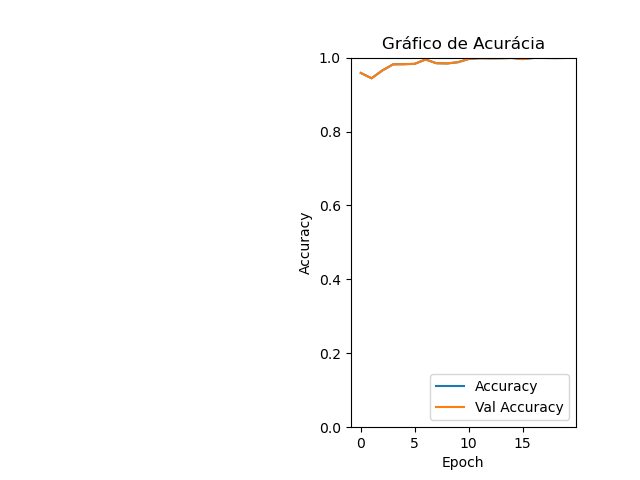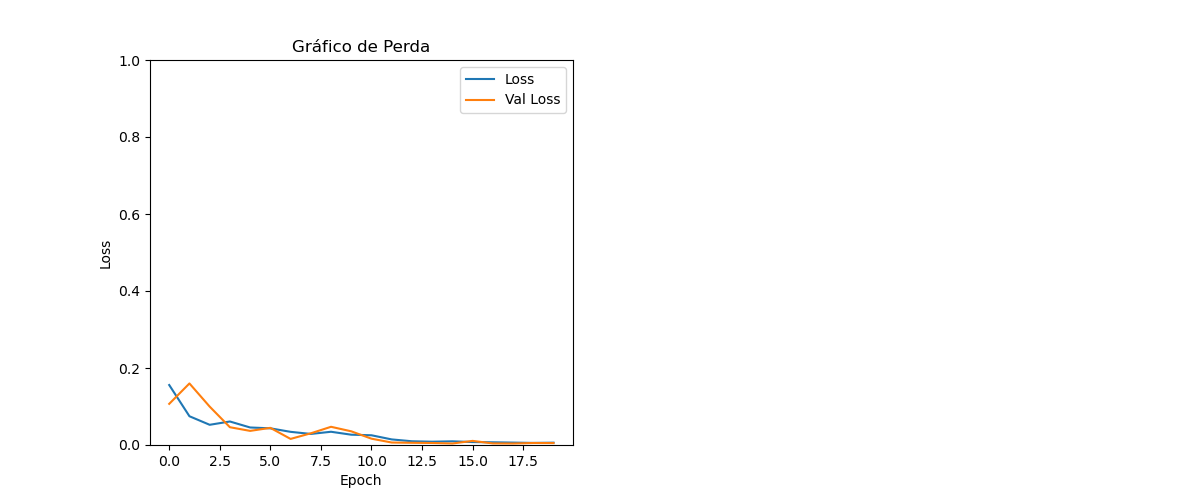

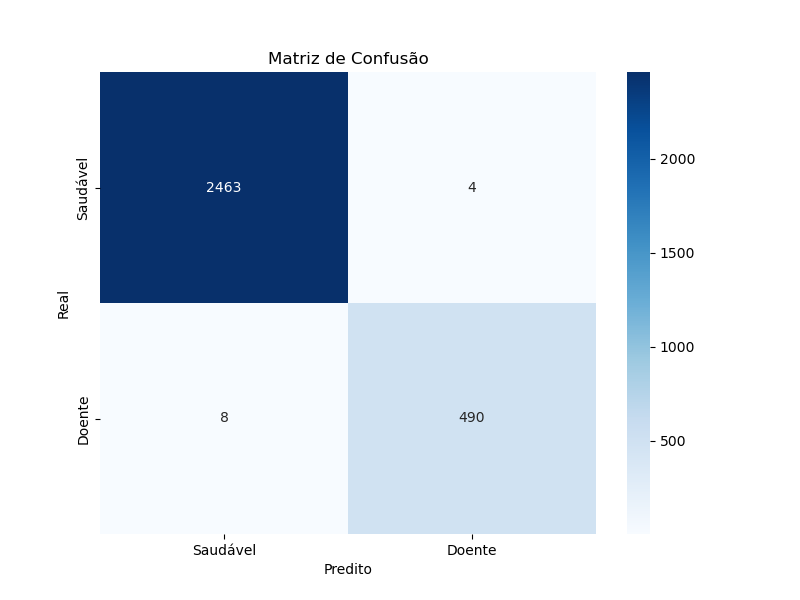

## Modelo Customizado 1

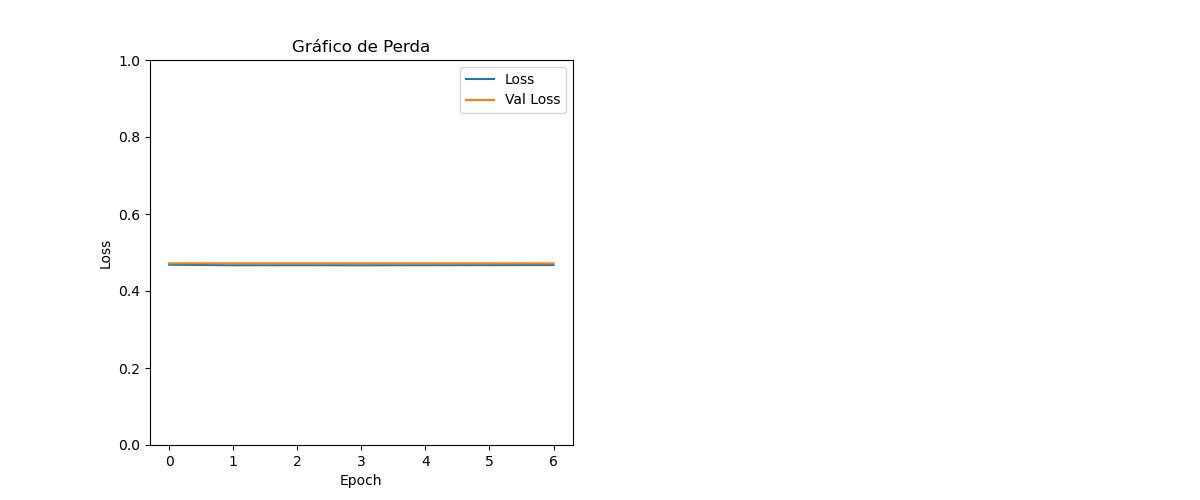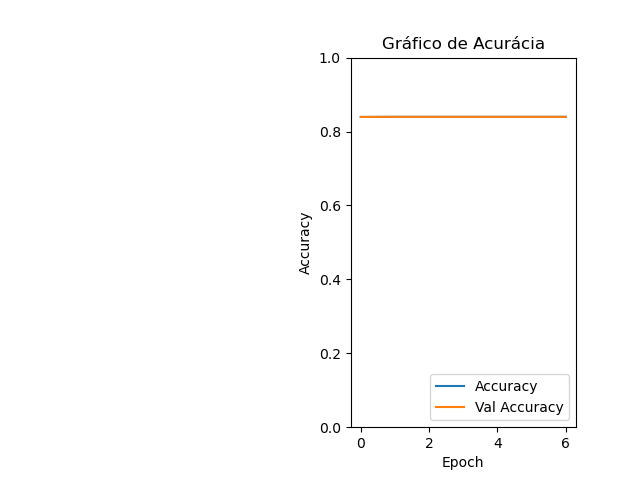

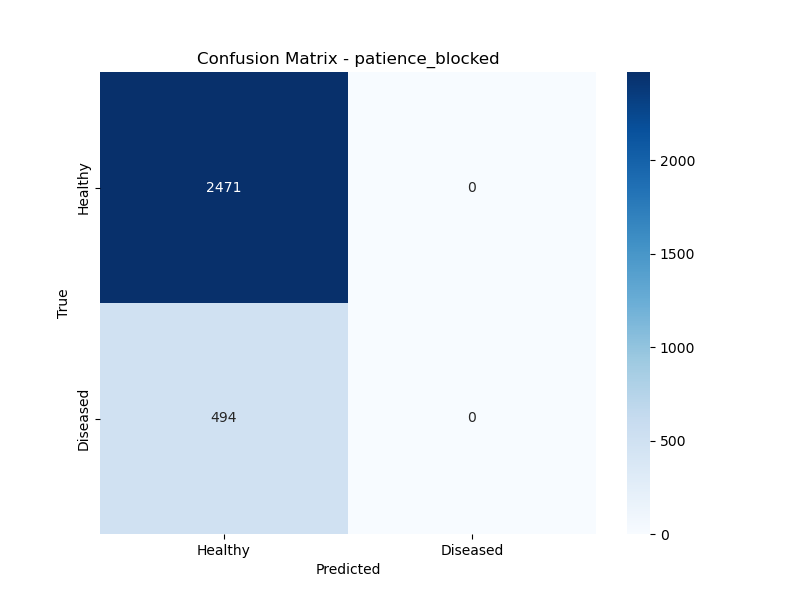

## Modelo Customizado 2

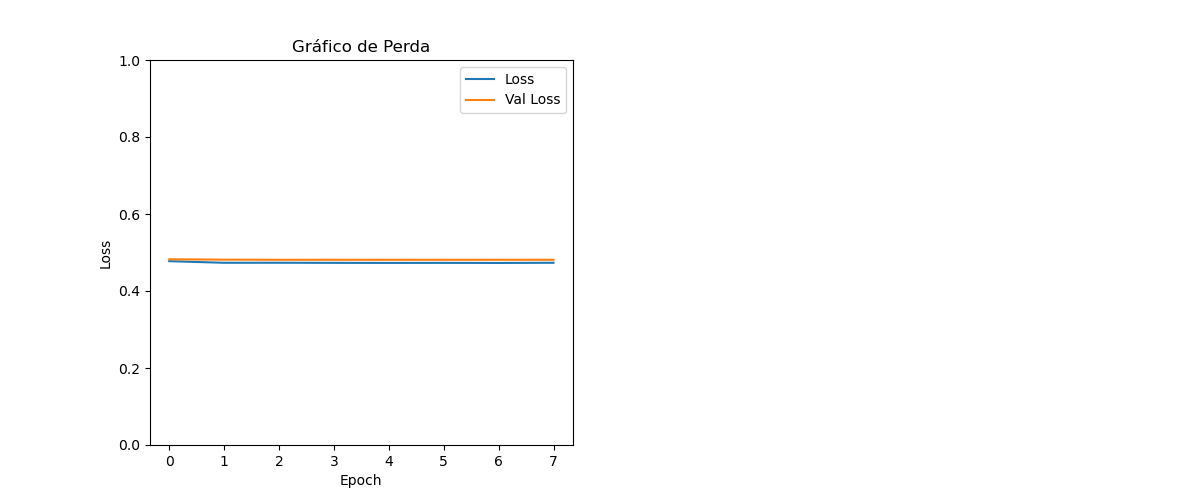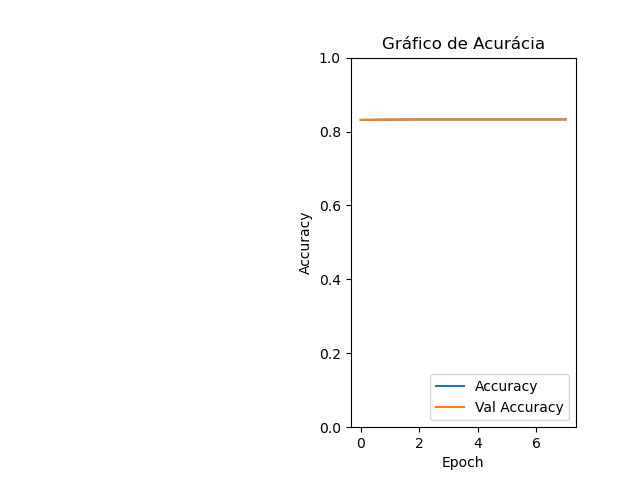

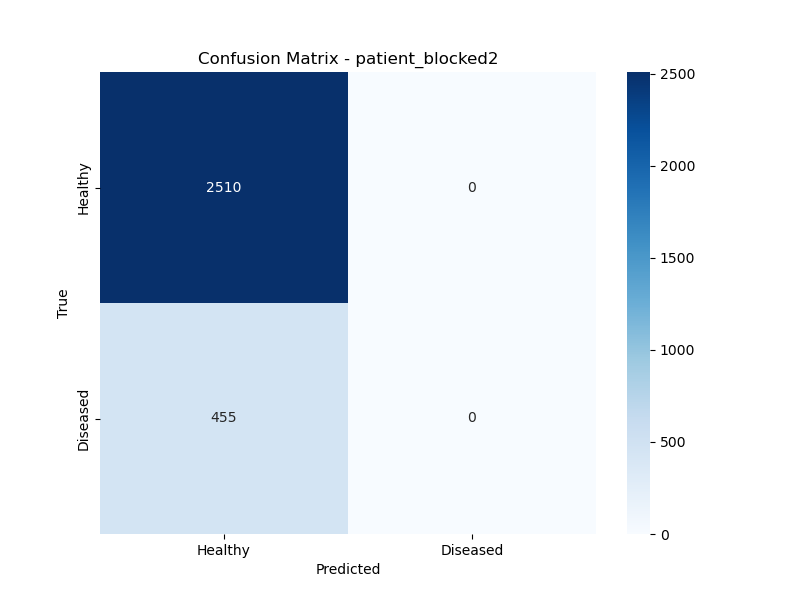

## Modelo Customizado 3

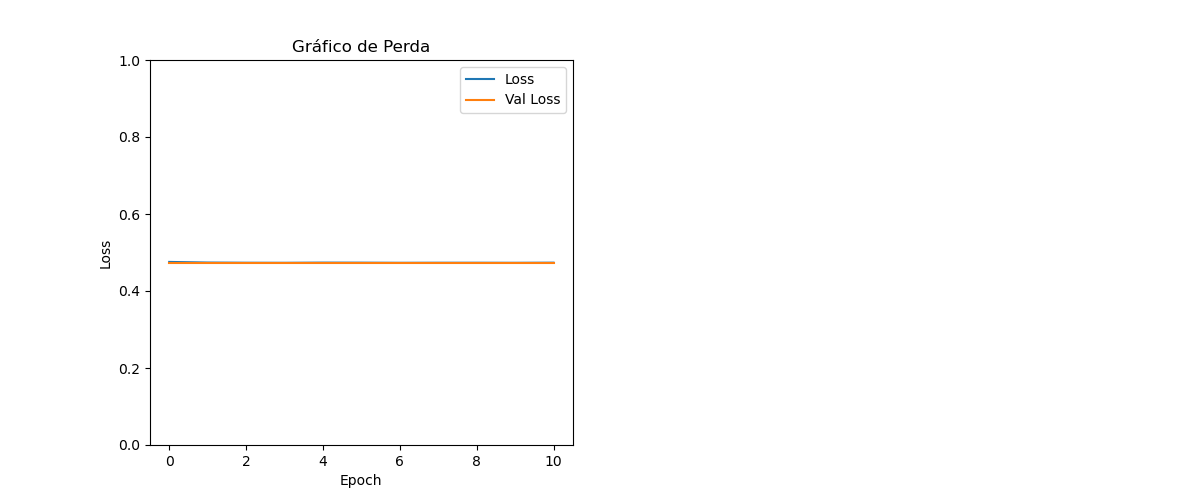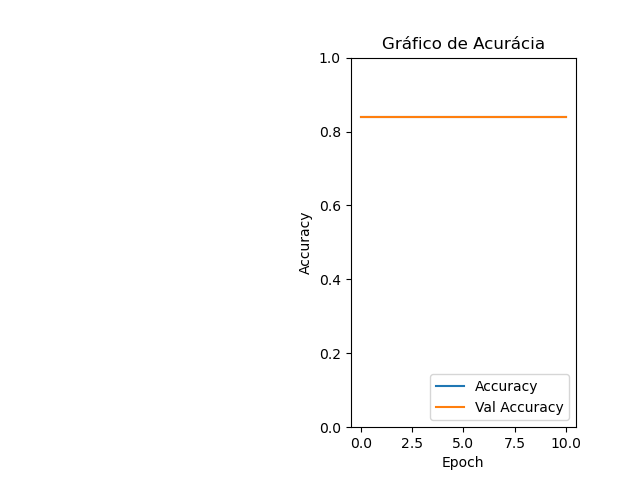

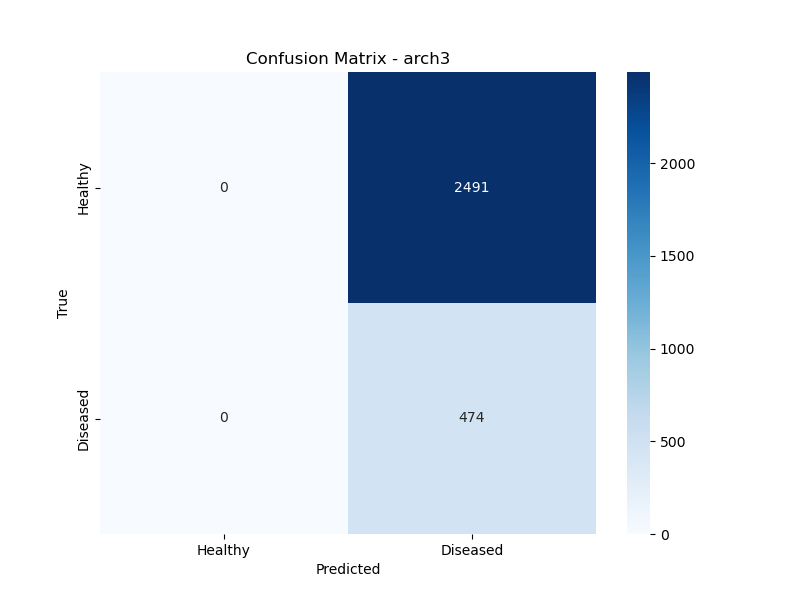